In [ ]:
"""
Introduction and Problem Statement
This task focuses on predicting medical insurance charges using a Linear Regression model. The goal is to estimate how much a person may need to 
pay for health insurance based on their profile. The dataset includes details such as age, BMI, smoking status, gender, number of children and region. 
By understanding how these factors influence costs, we can build a model that predicts the expected insurance charge for a new user.
"""

In [43]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
#Load dataset
df = pd.read_csv("insurance.csv")

In [ ]:
"""
Dataset Understanding and Description
The dataset is the Medical Cost Personal Dataset. It contains 1338 records with the following columns:
age: Age of the individual
sex: Male or female
bmi: Body Mass Index
children: Number of dependents
smoker: Whether the person smokes
region: Residential area in the US
charges: Medical insurance cost (target variable)
The dataset helps identify how personal habits and physical features affect insurance charges.
"""

In [ ]:
"""
Data Cleaning and Preparation
The dataset is already clean with no missing values, so no major cleaning is required. To prepare it for modeling, categorical columns such as sex,
smoker and region were converted into numerical form using one-hot encoding. The target column “charges” was separated from the input features. 
The dataset was then split into training and testing sets so the model could be evaluated properly.
"""

In [ ]:
"""
Exploratory Data Analysis (EDA)
Exploratory analysis helps us understand which factors affect insurance costs the most.
The following visualizations were created:
BMI vs Charges graph shows that higher BMI often leads to higher charges.
Age vs Charges graph shows that older people generally pay more.
Smoker vs Charges boxplot shows a very large difference: smokers have much higher charges compared to non-smokers.
These patterns confirm that smoking status, age and BMI are key contributors to medical costs.
"""

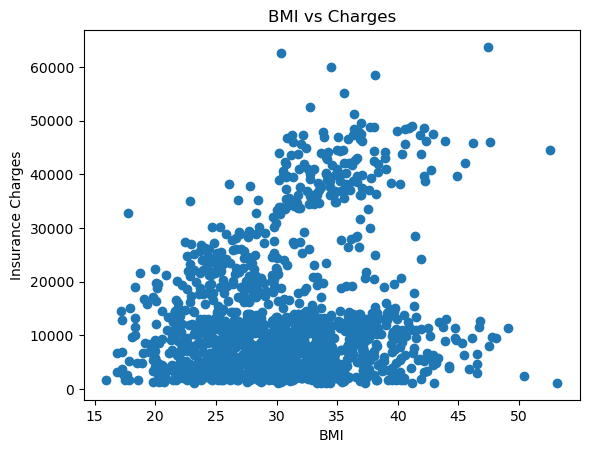

In [48]:
#Visualizations
#BMI vs Charges
plt.scatter(df['bmi'], df['charges'])
plt.xlabel("BMI")
plt.ylabel("Insurance Charges")
plt.title("BMI vs Charges")
plt.show()

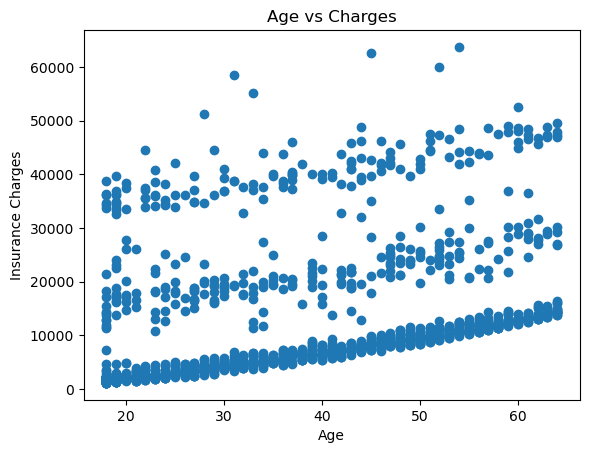

In [49]:
#Age vs Charges
plt.scatter(df['age'], df['charges'])
plt.xlabel("Age")
plt.ylabel("Insurance Charges")
plt.title("Age vs Charges")
plt.show()

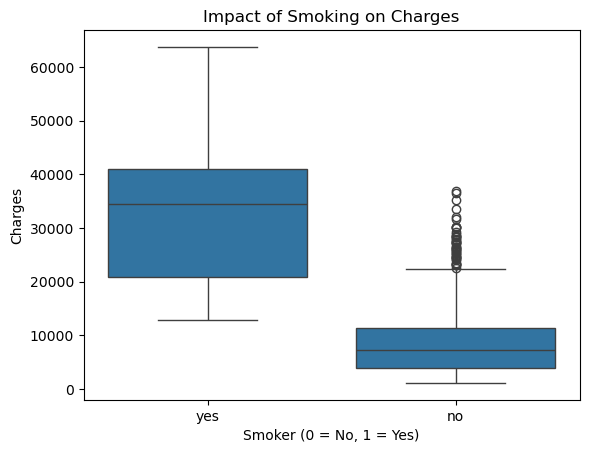

In [50]:
#Smoking Impact
sns.boxplot(x="smoker", y="charges", data=df)
plt.xlabel("Smoker (0 = No, 1 = Yes)")
plt.ylabel("Charges")
plt.title("Impact of Smoking on Charges")
plt.show()

In [ ]:
"""
Model Training and Testing
A Linear Regression model was trained using the prepared dataset. The model learned the relationship between the features and the insurance charges. 
After training, predictions were made on the test set to evaluate how well the model performs.
"""

In [52]:
#Convert categorical columns
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [53]:
#Train-test split
X = df.drop("charges", axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
#Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
#Predict on test set
y_pred = model.predict(X_test)

In [ ]:
"""
Evaluation Metrics (MAE & RMSE)
Two metrics were used:
MAE (Mean Absolute Error) shows the average difference between predicted and actual values.
RMSE (Root Mean Squared Error) gives a stronger penalty for larger errors.
These scores help measure how close the predictions are to real insurance charges. Lower values indicate better performance.
"""

In [57]:
#Evaluate Model (MAE & RMSE)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 4181.1944737536505
RMSE: 5796.284659276273


In [60]:
#Take user input and predict insurance cost
def predict_cost():
    age = float(input("Enter age: "))
    bmi = float(input("Enter BMI: "))
    children = int(input("Enter number of children: "))
    sex = input("Enter sex (male/female): ").lower()
    smoker = input("Are you a smoker? (yes/no): ").lower()
    region = input("Region (southwest/southeast/northwest/northeast): ").lower()

    data = {
        "age": age,
        "bmi": bmi,
        "children": children,
        "sex_male": 1 if sex == "male" else 0,
        "smoker_yes": 1 if smoker == "yes" else 0,
        "region_northwest": 1 if region == "northwest" else 0,
        "region_southeast": 1 if region == "southeast" else 0,
        "region_southwest": 1 if region == "southwest" else 0,
    }

    df_input = pd.DataFrame([data])
    result = model.predict(df_input)[0]
    print(f"\nEstimated Insurance Cost:\n {round(result, 2)}\n")

while True:
    predict_cost()
    again = input("Predict again? (yes/no): ").lower()
    if again != "yes":
        break

Enter age:  35
Enter BMI:  32
Enter number of children:  3
Enter sex (male/female):  male
Are you a smoker? (yes/no):  no
Region (southwest/southeast/northwest/northeast):  southeast



Estimated Insurance Cost:
 8449.27



Predict again? (yes/no):  no


In [ ]:
"""
Conclusion and Key Insights
The model shows that medical insurance charges depend strongly on age, BMI and smoking habits. Among all features, smoking status has the highest 
impact on cost. The Linear Regression model performs reasonably well with acceptable MAE and RMSE values. The final notebook also includes a user 
input section where anyone can enter their details and receive an estimated insurance cost.
"""